**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

**w = w - α*dw** ,dw => partial derivative of loss w.r.t to w

**b = b - α*db**    ,db => partial derviative of loss w.r.t to b

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

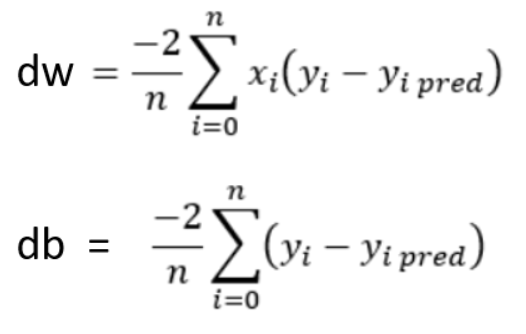

#Building the model:

In [ ]:
#importing numpy library
import numpy as np

In [ ]:
# we create a class called Linear_regression, which acts as a template for all the functions and tasks it does:
class linear_regression():
    #initiating the parameters (learning rate & no. of iterations of the model)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self,x,y):

        #no. of features are 1 in this case
        # no. of rows and columns
        if len(x.shape) == 1 :
            self.n = 1
            self.m = x.shape[0]
        else:
            self.m , self.n = x.shape


        # initiating the weight and bias, where bias is single value , but weights can be multiple depending on the features
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        # implementing gradient descent

        for i in range(self.no_of_iterations):
            self.update_parameters()

    def update_parameters(self):
        y_prediction = self.predict(self.x)

        #calculating gradients
        dw = -(2*(self.x.T).dot(self.y - y_prediction))/self.m
        db = -(2*(np.sum(self.y-y_prediction)))/self.m

        # updating the parameters
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self,x):
        return x.dot(self.w) + self.b


1) First of all every function has the parameter **self**, in it because in the code everytime we create an instance of this model

Eg: model = LogisticRegression(), now this **model** will go into the class as the self parameter, for further running of the model.

#Using the model for prediction:

In [ ]:
#importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
salary_data = pd.read_csv('/content/salary_data_Linear_regression.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#splitting data into features and labels
x = salary_data.iloc[:,:-1]
y = salary_data.iloc[:,1]

In [ ]:
print(x)
x.shape

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


(30, 1)

In [ ]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [ ]:
# Train test splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 3)

In [ ]:
print(x_train.shape, y_train.shape)

(20, 1) (20,)


In [ ]:
#training the data:
model = linear_regression(learning_rate = 0.02, no_of_iterations = 1000)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
#printing the values of weight and bias
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9461.775998886964
bias =  26493.429738199593


Therefore, the equation can be written as:

y = 9461(x) + 26493

In [ ]:
#printing test data predictions:
test_data_predictions = model.predict(x_test)

In [ ]:
print(test_data_predictions)

15     72856.132133
5      53932.580135
22    101241.460129
26    116380.301728
18     82317.908132
14     69071.421733
13     65286.711334
2      40686.093737
16     74748.487333
1      38793.738537
dtype: float64


Visualizing the predicted values:

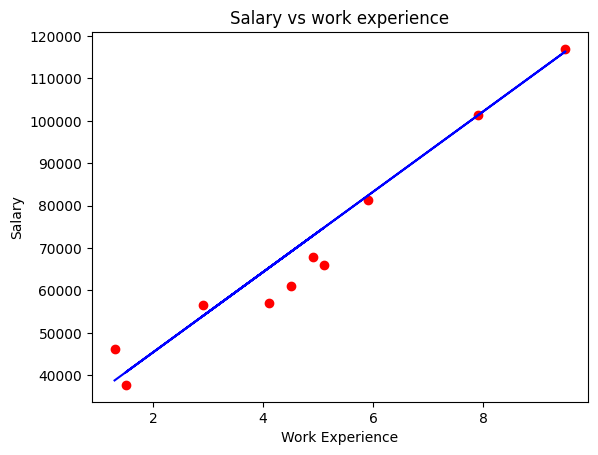

In [ ]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,test_data_predictions, color = 'Blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs work experience')
plt.show()